# Zadaci – Python osnove (NumPy, matplotlib)

U nastavku se nalazi 5 zadataka. Svaki zadatak sadrži opis i podkorake u Markdown ćelijama, kao i prazne kod ćelije u koje treba upisati rešenje.

## Zadatak 1: NumPy – reshape, view i modifikacije

Dat je jednodimenzionalni NumPy niz koji sadrži uzastopne celobrojne vrednosti.

**Podzadaci:**
1. Napraviti NumPy niz `x` koji sadrži vrednosti od 1 do 12  
2. Preoblikovati niz u matricu dimenzija `(3, 4)` i sačuvati je u promenljivoj `X`  
3. Izmeniti vrednost elementa u prvom redu i prvoj koloni matrice `X`  
4. Proveriti da li je došlo do promene u originalnom nizu `x`  
5. Proveriti i prikazati broj dimenzija i tip podataka u `X` promenljivoj

In [7]:
import numpy as np 
import copy
x = np.arange(1,13)
X = x.reshape(3,4)
print(x)
print(X)
X[0,0] = 100
print(X,x)
X.ndim, X.dtype

X_new = copy.deepcopy(X)
X_new[0,0] = 123
X_new, X, x



[ 1  2  3  4  5  6  7  8  9 10 11 12]
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
[[100   2   3   4]
 [  5   6   7   8]
 [  9  10  11  12]] [100   2   3   4   5   6   7   8   9  10  11  12]


(array([[123,   2,   3,   4],
        [  5,   6,   7,   8],
        [  9,  10,  11,  12]]),
 array([[100,   2,   3,   4],
        [  5,   6,   7,   8],
        [  9,  10,  11,  12]]),
 array([100,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12]))

## Zadatak 2: NumPy – slučajni brojevi i statistika

Rad sa generatorom slučajnih brojeva i statističkim operacijama.

**Podzadaci:**
1. Inicijalizovati generator slučajnih brojeva pomoću  
   `np.random.default_rng(2025)`  
2. Generisati matricu `X` dimenzija `(100, 5)` iz standardne normalne raspodele  
3. Izračunati srednju vrednost i standardnu devijaciju **po kolonama**  
4. Izračunati ukupnu varijansu cele matrice  
5. Uporediti ukupnu varijansu sa prosečnom varijansom po kolonama

In [8]:
rng = np.random.default_rng(2025)
X = rng.normal(size=(100,5))
mean_col = X.mean(axis=0)
std_col = X.std(axis=0)
total_var = X.var()
mean_col_var = X.var(axis=0).mean()
mean_col, total_var, mean_col_var, std_col


(array([-0.04002851,  0.03674091, -0.14693154,  0.14351709, -0.06568197]),
 np.float64(1.045503753773302),
 np.float64(1.035822865704377),
 array([1.0206377 , 0.88550463, 1.08774208, 1.04617892, 1.03712169]))

## Zadatak 3: NumPy – vektorizacija i korelacija

**Podzadaci:**
1. Generisati vektor `x` dužine 200 iz raspodele `N(0, 1)` (korisiti isti generator slučajnih brojeva iz prethodnog zadatka) 
2. Generisati šum `ε ~ N(0, 0.5)` i konstruisati vektor  
   `y = 3x + ε`  
3. Izračunati korelaciju između vektora `x` i `y` bez korišćenja petlji  
4. Izračunati srednju vrednost i standardnu devijaciju za oba vektora  
5. Prikazati sve dobijene vrednosti 

In [11]:
import numpy as np
rng = np.random.default_rng(2025)
x = rng.standard_normal(200)
eps = rng.normal(loc=0.0, scale=np.sqrt(0.5), size=200)
y = 3 * x + eps
corr = np.corrcoef(x,y)[0,1]
mean_x, std_x = np.mean(x), np.std(x)
mean_y, std_y = np.mean(y), np.std(y)
print ("srednja vrednost x je:", mean_x)
print("standardna devijacija x:", std_x)
print("\n srednja vrednost y je:", mean_y)
print("standardna devijacija y je:", std_y)
print("\n korelacija izmedju x i y: ", corr)
       


srednja vrednost x je: -0.03385655250966062
standardna devijacija x: 1.1111468427639732

 srednja vrednost y je: -0.09737666164748791
standardna devijacija y je: 3.4477659126935793

 korelacija izmedju x i y:  0.9780693721230401


## Zadatak 4: Matplotlib – više subplotova u jednom redu (1×3)

Cilj zadatka je upoznavanje sa `matplotlib` funkcijom `subplots()`.

**Podzadaci:**
1. Generisati vektor `x` sa 100 slučajnih realnih vrednosti  
2. Napraviti jednu figuru sa tri subplota u jednom redu (1×3)
3. Na prvom subplotu prikazati linijski graf vektora `x`  
4. Na drugom subplotu prikazati histogram vektora `x`  
5. Na trećem subplotu prikazati scatter graf `(x, x²)`  
6. Svakom subplotu dodati odgovarajući naslov

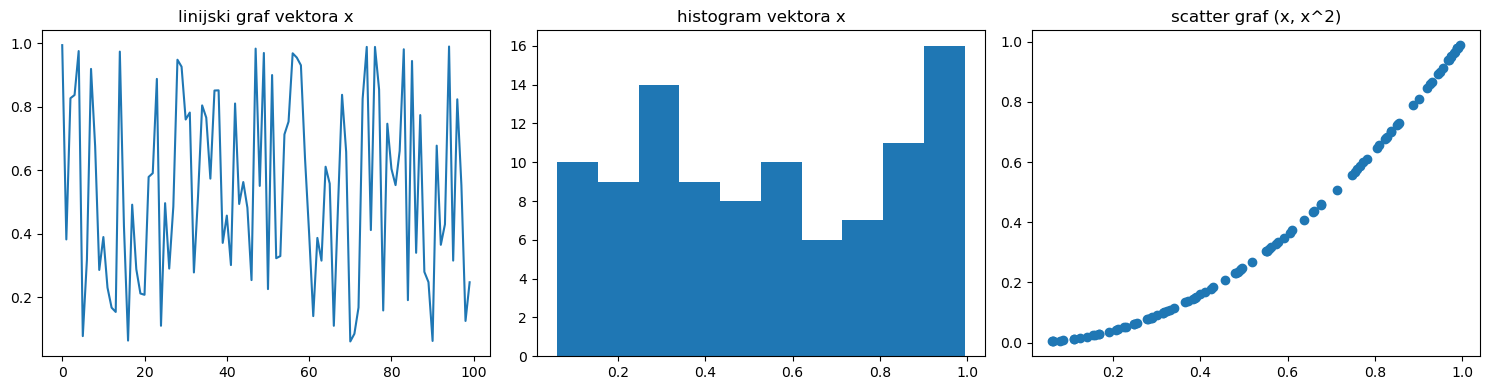

In [14]:
import numpy as np
import matplotlib.pyplot as plt
rng = np.random.default_rng(2025)
x = rng.random(100)
fig, axes = plt.subplots(1, 3, figsize=(15,4))
axes[0].plot(x)
axes[0].set_title("linijski graf vektora x")
axes[1].hist(x, bins=10)
axes[1].set_title("histogram vektora x")
axes[2].scatter(x, x**2)
axes[2].set_title("scatter graf (x, x^2)")
plt.tight_layout()
plt.show()


## Zadatak 5: Matplotlib – mreža subplotova (2×2)

U ovom zadatku koristi se složeniji raspored grafika.

**Podzadaci:**
1. Napraviti figuru sa mrežom **2×2 subplotova**  
2. Generisati dva vektora `x` i `y` iste dužine sa slučajnim vrednostima  
3. Prikazati sledeće grafike:
   - (0,0): scatter graf `x` vs `y`  
   - (0,1): scatter graf `x` vs `y` sa drugim markerom  
   - (1,0): linijski graf vektora `x`  
   - (1,1): histogram vektora `y`  
4. Podesiti naslov svakog od zadatih grafika  
5. Podesiti veličinu figure tako da svi grafici budu jasno vidljivi
6. Sačuvati grafik kao .png fajl

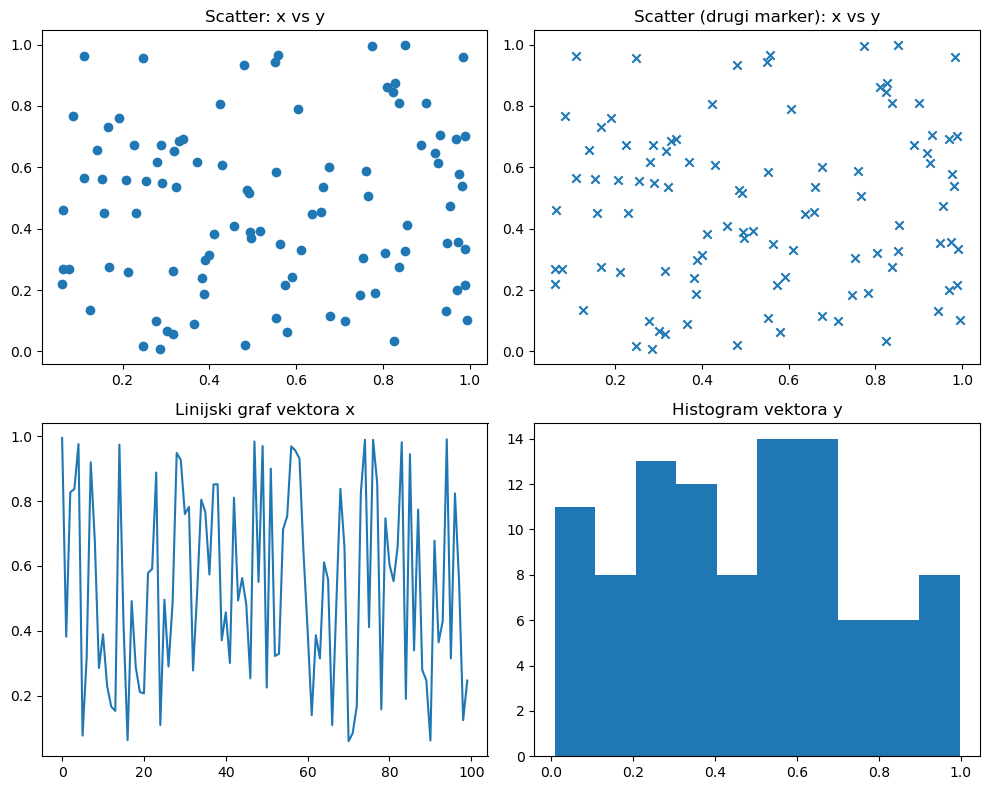

In [20]:
import numpy as np 
import matplotlib.pyplot as olt
rng = np. random.default_rng(2025)
x = rng.random (100)
y = rng.random (100)
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes[0, 0].scatter(x, y)
axes[0, 0].set_title("Scatter: x vs y") 
axes[0, 1].scatter(x, y, marker='x')
axes[0, 1].set_title("Scatter (drugi marker): x vs y") 
axes[1, 0].plot(x)
axes[1, 0].set_title("Linijski graf vektora x") 
axes[1, 1].hist(y, bins=10)
axes[1, 1].set_title("Histogram vektora y")
plt.tight_layout() 
plt.savefig("subplot 2x2.png" )
plt.show()


In [21]:
s = rng.normal(size = 200, loc=0, scale=1)
print(s)


[ 0.30267735  1.04448996  0.72054717  0.30274354  1.03946999  3.23248601
 -0.93527432 -0.50715943 -0.50259942 -0.0101002  -0.47040818 -2.22419758
  0.52176507 -0.63777625 -1.78592534 -1.27840404 -1.18744886 -1.36496231
 -0.45672001  1.17697703  0.36634679 -0.395502    1.51440766 -0.59272707
 -0.47604384 -0.84610733 -0.22476764  0.56442875 -1.5305112  -0.75287349
  2.19466641 -1.04567976  0.31120177 -0.18489664 -0.00708909 -0.2229731
 -0.68527494  0.18388014  0.15769872  0.92190528  2.43163109 -0.31500046
  1.59891039  1.65339211  0.24683019 -1.14075776  0.17395677 -1.49682353
 -0.16813888 -0.82261976  0.77157483  0.15710658 -1.98670595  0.4620718
  0.92000854 -2.07136595  0.8379779  -2.21187746 -0.64040433 -0.08855707
  0.18342847 -0.13862348  1.29735335  0.8305113   0.11837779  0.57696736
 -1.08923558 -0.04644235 -0.33795585  1.41236087 -0.23757773  0.6901548
 -0.40473019 -1.34711292  0.51271006  0.52370118 -0.27005667 -2.55351287
 -0.98531962  1.29687227  0.784114    0.74221729  0.60